<a href="https://colab.research.google.com/github/Shurui-Zhang/Deep_learning/blob/main/Lab3ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import math
import torch.optim as optim
def rastrigin(x):
  # x形似torch.IntTensor([1, 2, 3])
  n = x.shape[0]
  sum = 0
  for i in range(n):
    sum += x[i] ** 2 - torch.cos(2 * math.pi * x[i])
  
  return n + sum

# def rastrigin(x):
#   return 2 + (x[0] ** 2 - torch.cos(2 * math.pi * x[0])) + (x[1] ** 2 - torch.cos(2 * math.pi * x[1]))


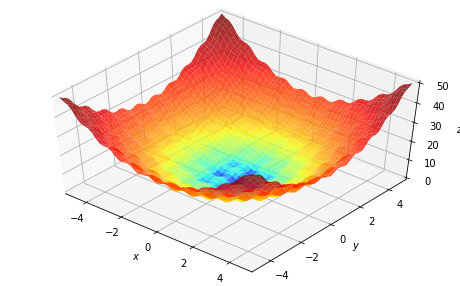

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep)) #np.meshgrid()生成网格点坐标矩阵
z = rastrigin(torch.tensor([x, y])).numpy()

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Log scale: values of z <= 0 have been masked
  import sys


(-5.0, 5.0)

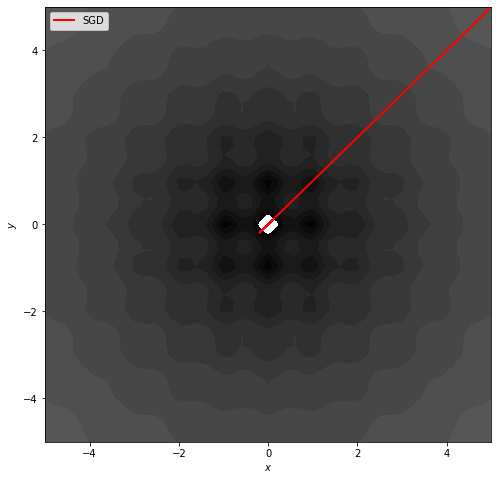

In [ ]:
xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = rastrigin(torch.tensor([x, y])).numpy()

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01) #当为SGD时，最终会停在（2.5， 2.5）的位置，陷入局部最优
opt = optim.SGD([p], lr=0.01, momentum=0.8) #当为SGDM时，若动量为0.9，会逃离SGD中的局部最优，并以很快的速度达到全局最优
##opt = optim.Adagrad([p], lr=0.01) #可能是由于循环次数不够，p位置一直没有更新。当把循环次数增加到1000是，才看到p的运动轨迹，但最终位置依然陷入了局部最优
#opt = optim.Adam([p], lr=0.01) #p点的运动轨迹很短，但依旧是朝着全局最优的方向更新

path = np.empty((2,0))
path = np.append(path, p.data.numpy(), axis=1)#axis = 1表示沿着列方向添加p.data.numpy()

for i in range(100):
    opt.zero_grad()
    output = rastrigin(p)
    output.backward()
    opt.step()
    path = np.append(path, p.data.numpy(), axis=1)


ax.plot(path[0], path[1], color='red', label='SGD', linewidth=2)

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

In [ ]:
a = rastrigin(torch.tensor([[0],[0]]))
print(a)

tensor([0.])


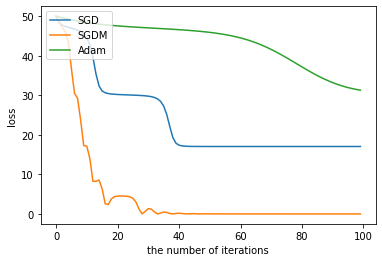

In [ ]:
list_x1 = []
list_y1 = []
p1 = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt1 = optim.SGD([p1], lr=0.01) #当为SGD时，最终会停在（2.5， 2.5）的位置，陷入局部最优
for i in range(100):
    opt1.zero_grad()
    output = rastrigin(p1)
    output.backward()
    opt1.step()
    list_x1.append(i)
    list_y1.append(output)


list_x2 = []
list_y2 = []
p2 = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt2 = optim.SGD([p2], lr=0.01, momentum=0.8) #当为SGDM时，若动量为0.9，会逃离SGD中的局部最优，但会经过全局最优后陷入新的局部最优。但动量为0.8时，离全局最优最近
for i in range(100):
    opt2.zero_grad()
    output = rastrigin(p2)
    output.backward()
    opt2.step()
    list_x2.append(i)
    list_y2.append(output)

list_x3 = []
list_y3 = []
p3 = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt3 = optim.Adagrad([p3], lr=0.01) #可能是由于循环次数不够，p位置一直没有更新。当把循环次数增加到1000是，才看到p的运动轨迹，但最终位置依然陷入了局部最优
for i in range(100):
    opt3.zero_grad()
    output = rastrigin(p3)
    output.backward()
    opt3.step()
    list_x3.append(i)
    list_y3.append(output)



list_x4 = []
list_y4 = []
p4 = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt4 = optim.Adam([p4], lr=0.01) #p点的运动轨迹很短，但依旧是朝着全局最优的方向更新
for i in range(100):
    opt4.zero_grad()
    output = rastrigin(p4)
    output.backward()
    opt4.step()
    list_x4.append(i)
    list_y4.append(output)



# 绘制数据
plt.plot(list_x1, list_y1, label='SGD')
plt.plot(list_x2, list_y2, label='SGDM')
#plt.plot(list_x3, list_y3, label='Adagrad')
plt.plot(list_x4, list_y4, label='Adam')


# 标记
plt.xlabel("the number of iterations")
plt.ylabel("loss")

plt.legend(loc="upper left")


plt.show()



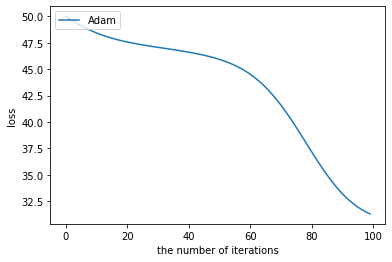

In [ ]:
list_x4 = []
list_y4 = []
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt4 = optim.Adam([p], lr=0.01)
for i in range(100):
    opt4.zero_grad()
    output = rastrigin(p)
    output.backward()
    opt4.step()
    list_x4.append(i)
    list_y4.append(output)

# 绘制数据
plt.plot(list_x4, list_y4, label='Adam')


# 标记
plt.xlabel("the number of iterations")
plt.ylabel("loss")
plt.legend(loc="upper left")
plt.show()

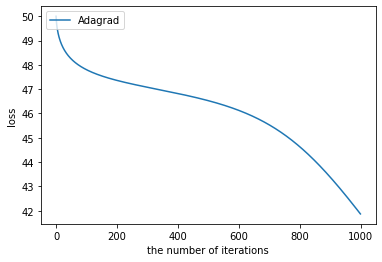

In [ ]:
list_x4 = []
list_y4 = []
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt3 = optim.Adagrad([p], lr=0.01)
for i in range(1000):
    opt3.zero_grad()
    output = rastrigin(p)
    output.backward()
    opt3.step()
    list_x4.append(i)
    list_y4.append(output)

# 绘制数据
plt.plot(list_x4, list_y4, label='Adagrad')


# 标记
plt.xlabel("the number of iterations")
plt.ylabel("loss")
plt.legend(loc="upper left")
plt.show()

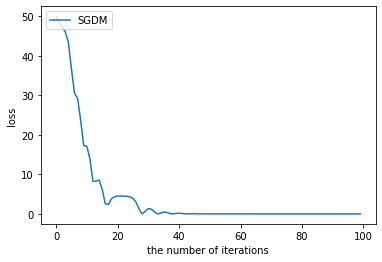

[tensor([50.], grad_fn=<AddBackward0>), tensor([48.4020], grad_fn=<AddBackward0>), tensor([47.1827], grad_fn=<AddBackward0>), tensor([46.0827], grad_fn=<AddBackward0>), tensor([43.4256], grad_fn=<AddBackward0>), tensor([36.7377], grad_fn=<AddBackward0>), tensor([30.5454], grad_fn=<AddBackward0>), tensor([29.2315], grad_fn=<AddBackward0>), tensor([23.7546], grad_fn=<AddBackward0>), tensor([17.2819], grad_fn=<AddBackward0>), tensor([17.1479], grad_fn=<AddBackward0>), tensor([13.9970], grad_fn=<AddBackward0>), tensor([8.2448], grad_fn=<AddBackward0>), tensor([8.2570], grad_fn=<AddBackward0>), tensor([8.5739], grad_fn=<AddBackward0>), tensor([6.3065], grad_fn=<AddBackward0>), tensor([2.5648], grad_fn=<AddBackward0>), tensor([2.3732], grad_fn=<AddBackward0>), tensor([3.7915], grad_fn=<AddBackward0>), tensor([4.3599], grad_fn=<AddBackward0>), tensor([4.5020], grad_fn=<AddBackward0>), tensor([4.5267], grad_fn=<AddBackward0>), tensor([4.5148], grad_fn=<AddBackward0>), tensor([4.4672], grad_fn=

In [ ]:
list_x4 = []
list_y4 = []
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt2 = optim.SGD([p], lr=0.01, momentum=0.8)
for i in range(100):
    opt2.zero_grad()
    output = rastrigin(p)
    output.backward()
    opt2.step()
    list_x4.append(i)
    list_y4.append(output)

# 绘制数据
plt.plot(list_x4, list_y4, label='SGDM')


# 标记
plt.xlabel("the number of iterations")
plt.ylabel("loss")
plt.legend(loc="upper left")
plt.show()
print(list_y4)

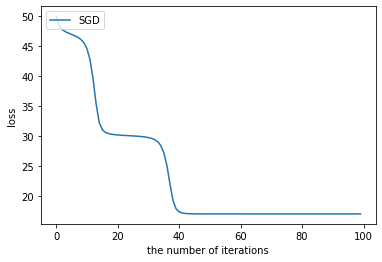

[tensor([50.], grad_fn=<AddBackward0>), tensor([48.4020], grad_fn=<AddBackward0>), tensor([47.7702], grad_fn=<AddBackward0>), tensor([47.4291], grad_fn=<AddBackward0>), tensor([47.1884], grad_fn=<AddBackward0>), tensor([46.9792], grad_fn=<AddBackward0>), tensor([46.7634], grad_fn=<AddBackward0>), tensor([46.5044], grad_fn=<AddBackward0>), tensor([46.1475], grad_fn=<AddBackward0>), tensor([45.5886], grad_fn=<AddBackward0>), tensor([44.6119], grad_fn=<AddBackward0>), tensor([42.7935], grad_fn=<AddBackward0>), tensor([39.5850], grad_fn=<AddBackward0>), tensor([35.3702], grad_fn=<AddBackward0>), tensor([32.3187], grad_fn=<AddBackward0>), tensor([31.0919], grad_fn=<AddBackward0>), tensor([30.6430], grad_fn=<AddBackward0>), tensor([30.4420], grad_fn=<AddBackward0>), tensor([30.3324], grad_fn=<AddBackward0>), tensor([30.2628], grad_fn=<AddBackward0>), tensor([30.2133], grad_fn=<AddBackward0>), tensor([30.1744], grad_fn=<AddBackward0>), tensor([30.1413], grad_fn=<AddBackward0>), tensor([30.111

In [ ]:
list_x4 = []
list_y4 = []
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt1 = optim.SGD([p], lr=0.01)
for i in range(100):
    opt1.zero_grad()
    output = rastrigin(p)
    output.backward()
    opt1.step()
    list_x4.append(i)
    list_y4.append(output)

# 绘制数据
plt.plot(list_x4, list_y4, label='SGD')


# 标记
plt.xlabel("the number of iterations")
plt.ylabel("loss")
plt.legend(loc="upper left")
plt.show()
print(list_y4)

In [ ]:
import pandas as pd
from torch.utils import data

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) 
df = df.sample(frac = 1, random_state = 0)#shuffle

df = df[df[4].isin(['Iris-virginica', 'Iris-versicolor'])] #filter

#add lable indices column
mapping = {k: v for v, k in enumerate(df[4].unique())}
df[5] = (2 * df[4].map(mapping)) - 1 #labels in {-1, 1}

#normalise data
alldata = torch.tensor(df.iloc[:, [0,1,2,3]].values, dtype=torch.float) 
alldata = (alldata - alldata.mean(dim = 0)) / alldata.var(dim = 0)

#create datasets
targets_tr = torch.tensor(df.iloc[:75, 5].values, dtype = torch.long)
targets_va = torch.tensor(df.iloc[75:, 5].values, dtype = torch.long)

data_tr = alldata[:75]
data_va = alldata[75:]

print(targets_tr.shape)
print(data_tr.shape)



dataset_tr = data.TensorDataset(data_tr, targets_tr) # create your datset
dataloade_tr = data.DataLoader(dataset_tr, batch_size=25, shuffle=True) # create your dataloader

torch.Size([75])
torch.Size([75, 4])


In [ ]:
def hinge_loss(y_pred, y_true):
    return torch.mean(torch.max(torch.zeros(y_true.shape[0]), 1-y_true*y_pred))

def svm(x, w, b):
    h = (w*x).sum(1) + b #sum(1)是对tensor的行求和
    return h

In [ ]:
# w = torch.randn(1, 4, requires_grad=True)
# b = torch.randn(1, requires_grad=True)

# w = torch.tensor([[-1.0351, -1.1271,  0.5348,  0.2619]], requires_grad=True)
# b = torch.tensor([1.6475], requires_grad=True)

#opt = optim.SGD([w,b], lr=0.01, weight_decay=0.01)
opt = optim.Adam([w,b], lr=0.01, weight_decay=0.01)

for epoch in range(100):
    running_loss = 0.0
    for batch in dataloade_tr:
        opt.zero_grad()
        output = hinge_loss(svm(batch[0], w, b), batch[1])
        #print(type(output))
        output.backward()
        opt.step()
        running_loss += output.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
    # print(w,b)

loss = hinge_loss(svm(data_va, w, b), targets_va)
print(loss)




NameError: ignored

In [ ]:
w = torch.tensor([[-1.0351, -1.1271,  0.5348,  0.2619]], requires_grad=True)
b = torch.tensor([1.6475], requires_grad=True)

opt1 = optim.Adam([w,b], lr=0.01, weight_decay=0.01)

for epoch in range(100):
    running_loss = 0.0
    for batch in dataloade_tr:
        opt1.zero_grad()
        output = hinge_loss(svm(batch[0], w, b), batch[1])
        #print(type(output))
        output.backward()
        opt1.step()
        running_loss += output.item()
    # print(w,b)

loss = hinge_loss(svm(data_va, w, b), targets_va)
print("the loss value when using Adam", loss)

w = torch.tensor([[-1.0351, -1.1271,  0.5348,  0.2619]], requires_grad=True)
b = torch.tensor([1.6475], requires_grad=True)
opt = optim.SGD([w,b], lr=0.01, weight_decay=0.01)
for epoch in range(100):
    running_loss = 0.0
    for batch in dataloade_tr:
        opt.zero_grad()
        output = hinge_loss(svm(batch[0], w, b), batch[1])
        #print(type(output))
        output.backward()
        opt.step()
        running_loss += output.item()
    # print(w,b)

loss = hinge_loss(svm(data_va, w, b), targets_va)
print("the loss value when using SGD", loss)